In [73]:
# xls file dependency
#!pip install xlrd    


In [74]:
#!pip install missingno


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df=pd.read_excel(r"C:\Users\devas\Downloads\Superstore-Final.xlsx")
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales Trend
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Medium
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,High
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Low
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,High
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Low


# DATA CLEANING

Removing Duplicate Row

In [77]:
df=df.drop_duplicates()

In [78]:
df.shape

(3999, 21)

Fixing Missing Data

In [79]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Sales Trend'],
      dtype='object')

In [80]:
#checking missing values in every column (0 means no missing values)
df.isnull().sum()  
#there is no missing value in the whole dataframe

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Sales Trend      0
dtype: int64

#  Data Analysis and Summary

In [81]:
# storing our more relevant columns in new data frame

fdf=pd.DataFrame(df["Order ID"])
fdf["Product"]=df["Product Name"]
fdf["Category"]=df["Category"]
fdf["Region"]=df["Region"]
fdf["Quantity Sold"]=df["Quantity"]


Calculating Price per unit, considering the discount is applied on Sales

In [82]:

fdf["Unit Price"]=df.apply(
    lambda row: row['Sales'] / (row['Quantity']*(1-row['Discount'])),
    axis=1
)
    

In [83]:
fdf.head(6)

,Order ID,Product,Category,Region,Quantity Sold,Unit Price
0,CA-2016-152156,Bush Somerset Collection Bookcase,Furniture,South,2,130.98
1,CA-2016-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,South,3,243.98
2,CA-2016-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,West,2,7.31
3,US-2015-108966,Bretford CR4500 Series Slim Rectangular Table,Furniture,South,5,348.21
4,US-2015-108966,Eldon Fold 'N Roll Cart System,Office Supplies,South,2,13.98
5,CA-2014-115812,Eldon Expressions Wood and Plastic Desk Access...,Furniture,West,7,6.98


In [84]:
fdf["Total Sales"]=fdf["Quantity Sold"] * fdf["Unit Price"]

In [85]:
fdf

,Order ID,Product,Category,Region,Quantity Sold,Unit Price,Total Sales
0,CA-2016-152156,Bush Somerset Collection Bookcase,Furniture,South,2,130.98,261.96
1,CA-2016-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,South,3,243.98,731.94
2,CA-2016-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,West,2,7.31,14.62
3,US-2015-108966,Bretford CR4500 Series Slim Rectangular Table,Furniture,South,5,348.21,1741.05
4,US-2015-108966,Eldon Fold 'N Roll Cart System,Office Supplies,South,2,13.98,27.96
...,...,...,...,...,...,...,...
3995,CA-2015-105627,Hon Mobius Operator's Chair,Furniture,Central,7,122.99,860.93
3996,CA-2015-105627,Nortel Meridian M3904 Professional Digital phone,Technology,Central,5,153.99,769.95
3997,CA-2015-105627,Boston 1900 Electric Pencil Sharpener,Office Supplies,Central,1,14.98,14.98
3998,CA-2015-105627,Deflect-o Glass Clear Studded Chair Mats,Furniture,Central,6,62.18,373.08


In [86]:
fdf['Order Date']=df["Order Date"]

In [87]:
#Adding new column (customer type)
customer_counts = df['Customer ID'].value_counts() #if the cx ID has been occured more than once it means cx is repeating else cx is new
fdf["Customer Type"] =df["Customer ID"].apply(lambda x:'Returning Customer' if customer_counts[x] > 1 else 'New')
fdf

,Order ID,Product,Category,Region,Quantity Sold,Unit Price,Total Sales,Order Date,Customer Type
0,CA-2016-152156,Bush Somerset Collection Bookcase,Furniture,South,2,130.98,261.96,2016-11-08,Returning Customer
1,CA-2016-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,South,3,243.98,731.94,2016-11-08,Returning Customer
2,CA-2016-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,West,2,7.31,14.62,2016-06-12,Returning Customer
3,US-2015-108966,Bretford CR4500 Series Slim Rectangular Table,Furniture,South,5,348.21,1741.05,2015-10-11,Returning Customer
4,US-2015-108966,Eldon Fold 'N Roll Cart System,Office Supplies,South,2,13.98,27.96,2015-10-11,Returning Customer
...,...,...,...,...,...,...,...,...,...
3995,CA-2015-105627,Hon Mobius Operator's Chair,Furniture,Central,7,122.99,860.93,2015-03-08,Returning Customer
3996,CA-2015-105627,Nortel Meridian M3904 Professional Digital phone,Technology,Central,5,153.99,769.95,2015-03-08,Returning Customer
3997,CA-2015-105627,Boston 1900 Electric Pencil Sharpener,Office Supplies,Central,1,14.98,14.98,2015-03-08,Returning Customer
3998,CA-2015-105627,Deflect-o Glass Clear Studded Chair Mats,Furniture,Central,6,62.18,373.08,2015-03-08,Returning Customer


In [88]:
# just for checking
# new_customers = fdf[fdf['Customer Type'] == 'New']
# new_customers

In [89]:
# Top 10 orders with highest total sales
fdf.sort_values(by='Total Sales', ascending= False).head(10)

,Order ID,Product,Category,Region,Quantity Sold,Unit Price,Total Sales,Order Date,Customer Type
2697,CA-2014-145317,Cisco TelePresence System EX90 Videoconferenci...,Technology,South,6,7546.16,45276.96,2014-03-18,Returning Customer
683,US-2017-168116,Cubify CubeX 3D Printer Triple Head Print,Technology,South,4,3999.99,15999.96,2017-11-04,Returning Customer
2623,CA-2017-127180,Canon imageCLASS 2200 Advanced Copier,Technology,East,4,3499.99,13999.96,2017-10-22,Returning Customer
165,CA-2014-139892,Lexmark MX611dhe Monochrome Laser Printer,Technology,Central,8,1699.99,13599.92,2014-09-08,Returning Customer
3011,CA-2017-134845,Lexmark MX611dhe Monochrome Laser Printer,Technology,West,5,1699.99,8499.95,2017-04-17,Returning Customer
2505,CA-2014-143917,High Speed Automatic Electric Letter Opener,Office Supplies,West,5,1637.53,8187.65,2014-07-25,Returning Customer
509,CA-2015-145352,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,South,5,1270.99,6354.95,2015-03-16,Returning Customer
27,US-2015-150630,"Riverside Palais Royal Lawyers Bookcase, Royal...",Furniture,East,7,880.98,6166.86,2015-09-17,Returning Customer
3151,CA-2015-147830,Cubify CubeX 3D Printer Double Head Print,Technology,East,2,2999.99,5999.98,2015-12-15,Returning Customer
1803,CA-2017-158379,Martin Yale Chadless Opener Electric Letter Op...,Office Supplies,East,7,832.81,5829.67,2017-09-22,Returning Customer


In [90]:
#Orders with only Technology/Electronic category in West Region
fdf[(fdf["Category"] == "Technology") & (fdf["Region"] == "West")]


,Order ID,Product,Category,Region,Quantity Sold,Unit Price,Total Sales,Order Date,Customer Type
7,CA-2014-115812,Mitel 5320 IP Phone VoIP phone,Technology,West,6,188.99,1133.94,2014-06-09,Returning Customer
11,CA-2014-115812,Konftel 250 Conference phone - Charcoal black,Technology,West,4,284.82,1139.28,2014-06-09,Returning Customer
19,CA-2014-143336,Cisco SPA 501G IP Phone,Technology,West,3,88.95,266.85,2014-08-27,Returning Customer
26,CA-2016-121755,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,Technology,West,3,30.19,90.57,2016-01-16,Returning Customer
62,CA-2015-135545,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,Technology,West,2,6.99,13.98,2015-11-24,Returning Customer
...,...,...,...,...,...,...,...,...,...
3892,US-2016-163881,Logitech G500s Laser Gaming Mouse with Adjusta...,Technology,West,8,69.99,559.92,2016-11-24,Returning Customer
3935,CA-2017-123001,Ooma Telo VoIP Home Phone System,Technology,West,2,125.99,251.98,2017-09-02,Returning Customer
3952,US-2016-151862,RCA ViSYS 25423RE1 Corded phone,Technology,West,2,99.99,199.98,2016-03-01,Returning Customer
3978,CA-2017-101308,i.Sound Portable Power - 8000 mAh,Technology,West,2,52.99,105.98,2017-10-02,Returning Customer


In [91]:
# subtotals for the Total Sales by Region.
fdf.groupby(["Region"],as_index=False)["Total Sales"].sum()


,Region,Total Sales
0,Central,266439.67
1,East,329234.77
2,South,227790.08
3,West,349137.97


In [92]:
#pivot table that summarizes the Total Sales by Category and Region

fdf.pivot_table(
    values="Total Sales",  # Column to aggregate
    index="Region",         # Rows will be based on Region
    columns="Category",     # Columns will be based on Category
    aggfunc="sum",          # Sum the values in Total Sales
    fill_value=0            # Replace NaN with 0
)

Category,Furniture,Office Supplies,Technology
Region,,,
Central,92550.53,77067.28,96821.86
East,96251.46,106975.58,126007.73
South,50058.49,71018.49,106713.10
West,129724.24,92278.71,127135.02


In [93]:
#pivot table that shows the average Quantity Sold for each Product by Customer Type
fdf.pivot_table(
    values="Quantity Sold",  # Column to aggregate (Quantity Sold)
    index="Product",         # Rows will be based on Product
    columns="Customer Type", # Columns will be based on Customer Type
    aggfunc="mean",          # Aggregation function (mean for average)
    fill_value=0             # Fill missing values with 0
)




Customer Type,New,Returning Customer
Product,,
"""While you Were Out"" Message Book, One Form per Page",0.0,2.500000
"#10 Gummed Flap White Envelopes, 100/Box",0.0,2.666667
#10 Self-Seal White Envelopes,0.0,3.000000
"#10 White Business Envelopes,4 1/8 x 9 1/2",0.0,4.000000
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",0.0,3.500000
...,...,...
i.Sound Portable Power - 8000 mAh,0.0,1.666667
iHome FM Clock Radio with Lightning Dock,0.0,5.000000
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",0.0,3.000000


# Data Visualization

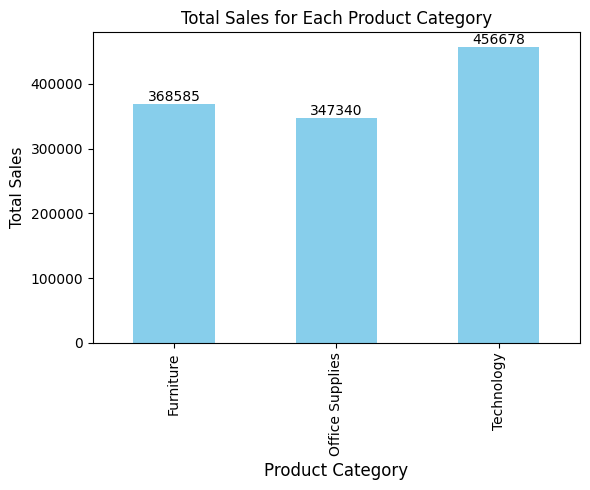

In [ ]:
# a bar chart that shows the total sales for each Product Category
category_sales = fdf.groupby('Category')['Total Sales'].sum()
ax=category_sales.plot(kind='bar', color='skyblue', figsize=(6,5))
plt.title('Total Sales for Each Product Category', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=11)


for bars in ax.containers:
    ax.bar_label(bars)



plt.tight_layout()
plt.savefig("category_sales.png")   #creating img to save in excel
plt.show()

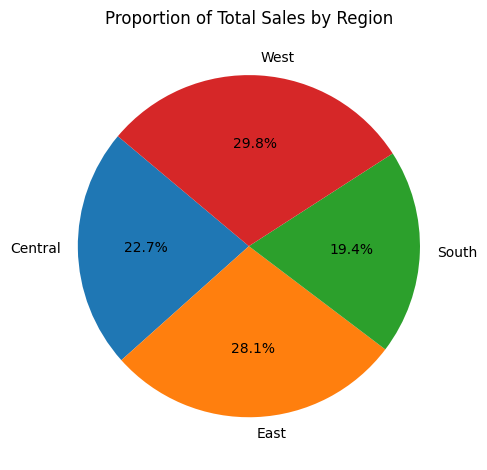

In [ ]:

# pie chart that shows the proportion of Total Sales by Region.

ax=fdf.groupby(["Region"],as_index=False)["Total Sales"].sum()
plt.pie(ax["Total Sales"],labels=ax["Region"], autopct='%1.1f%%',startangle=140)
plt.title('Proportion of Total Sales by Region')
plt.tight_layout()

plt.savefig("pie_plot.png")   #creating img to save in excel


plt.show()

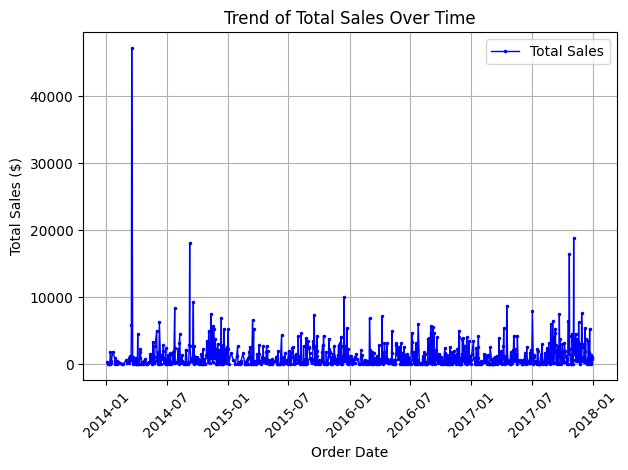

In [ ]:
#line chart that shows the trend of total sales over time

ax=fdf.groupby(["Order Date"], as_index=False)["Total Sales"].sum()
plt.plot(ax["Order Date"],ax["Total Sales"],marker='o', color='blue', label='Total Sales',linewidth=1, markersize=1.5)
plt.xlabel('Order Date')
plt.ylabel('Total Sales ($)')
plt.title('Trend of Total Sales Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.legend()
plt.savefig("line_trend.png")  #creating img to save in excel
plt.show()

In [ ]:
#dependencies for save images in excel
from openpyxl import Workbook
from openpyxl.drawing.image import Image

In [141]:
#creating excel and saving the previous chart into excel

wb = Workbook()
ws = wb.active

img1=Image("category_sales.png")
img2=Image("pie_plot.png")
img3=Image("line_trend.png")
ws.add_image(img1, 'A1')   # Add first image at cell A1
ws.add_image(img2,'A30')   # Add first image at cell A30
ws.add_image(img3,'A60')   # Add first image at cell A50
wb.save('Sales_Visuals.xlsx')

# Part 5

In [ ]:
#1

fdf.groupby(["Category"])["Total Sales"].sum().idxmax()

'Technology'

In [ ]:
#2
fdf.groupby(["Region"])["Total Sales"].sum().idxmax()

'West'

In [ ]:
#3
fdf.groupby(["Customer Type"])["Quantity Sold"].mean()

Customer Type
New                   3.760000
Returning Customer    3.808869
Name: Quantity Sold, dtype: float64

In [ ]:
#4
ax=fdf.groupby(["Order Date"], as_index=False)["Total Sales"].sum()

a=ax["Total Sales"].idxmax()
b=ax["Total Sales"].idxmin()
ax.loc[a]
ax.loc[b]

Order Date     2017-09-28 00:00:00
Total Sales                   2.18
Name: 859, dtype: object

In [123]:
ax["Total Sales"].median()

np.float64(570.4099999999999)

In [ ]:
#trimmed mean function dependencies
from scipy.stats import trim_mean

In [ ]:
#using trimmed means because dataset has outliers
trimmed_mean_sales=trim_mean(ax["Total Sales"],proportiontocut=0.1)

In [120]:
trimmed_mean_sales

np.float64(848.1294940079894)

In [126]:
#converting dataframe to xlsxx file
fdf.to_excel("sales_data_cleaned.xlsx",index=False)

In [125]:
import os
print(os.getcwd())


c:\Users\devas\Desktop


In [127]:
fdf

,Order ID,Product,Category,Region,Quantity Sold,Unit Price,Total Sales,Order Date,Customer Type
0,CA-2016-152156,Bush Somerset Collection Bookcase,Furniture,South,2,130.98,261.96,2016-11-08,Returning Customer
1,CA-2016-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,South,3,243.98,731.94,2016-11-08,Returning Customer
2,CA-2016-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,West,2,7.31,14.62,2016-06-12,Returning Customer
3,US-2015-108966,Bretford CR4500 Series Slim Rectangular Table,Furniture,South,5,348.21,1741.05,2015-10-11,Returning Customer
4,US-2015-108966,Eldon Fold 'N Roll Cart System,Office Supplies,South,2,13.98,27.96,2015-10-11,Returning Customer
...,...,...,...,...,...,...,...,...,...
3995,CA-2015-105627,Hon Mobius Operator's Chair,Furniture,Central,7,122.99,860.93,2015-03-08,Returning Customer
3996,CA-2015-105627,Nortel Meridian M3904 Professional Digital phone,Technology,Central,5,153.99,769.95,2015-03-08,Returning Customer
3997,CA-2015-105627,Boston 1900 Electric Pencil Sharpener,Office Supplies,Central,1,14.98,14.98,2015-03-08,Returning Customer
3998,CA-2015-105627,Deflect-o Glass Clear Studded Chair Mats,Furniture,Central,6,62.18,373.08,2015-03-08,Returning Customer
